# Data Science 301 Final Project
Anyesha Ray and Eric Gleiter

### Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vehicles.csv")
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
data.shape

(423857, 25)

In [4]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

### Variables we are interested in

Year

In [5]:
print (data['year'].value_counts().iloc[:10])

2017.0    30828
2015.0    21901
2014.0    21773
2013.0    21480
2016.0    21430
2012.0    19130
2011.0    18412
2018.0    17839
2019.0    16995
2008.0    16070
Name: year, dtype: int64


Text(0.5, 1.0, 'Number of Cars sold vs Year of the Car')

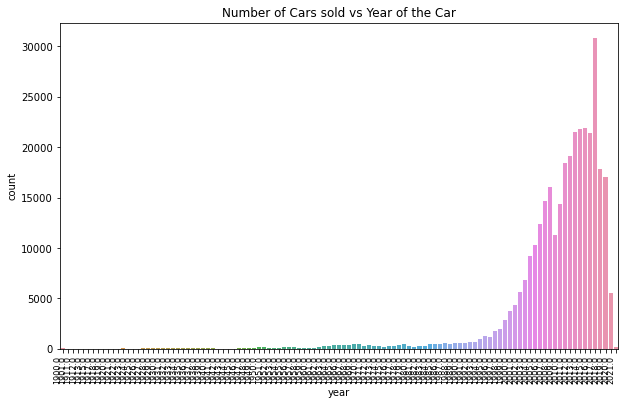

In [6]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Number of Cars sold vs Year of the Car")

 It seems that the car sales grew to large numbers during the 1960s. Doesn't really make sense to have cars before 1960.

In [7]:
data.drop(data[data.year < 1960].index, inplace = True)

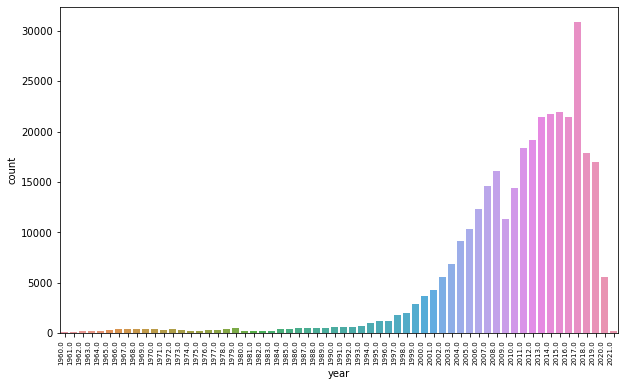

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=7);

Manufacturer

In [9]:
print ("The unique manufacturers we have are:")
print (data['manufacturer'].unique())

The unique manufacturers we have are:
['gmc' 'hyundai' 'toyota' 'mitsubishi' 'ford' 'chevrolet' 'ram' nan
 'buick' 'jeep' 'dodge' 'subaru' 'nissan' 'audi' 'rover' 'lexus' 'honda'
 'chrysler' 'mini' 'pontiac' 'mercedes-benz' 'cadillac' 'bmw' 'kia'
 'volvo' 'volkswagen' 'jaguar' 'acura' 'saturn' 'mazda' 'mercury'
 'lincoln' 'infiniti' 'ferrari' 'fiat' 'tesla' 'land rover'
 'harley-davidson' 'datsun' 'alfa-romeo' 'aston-martin' 'porche'
 'hennessey' 'morgan']


Text(0.5, 1.0, 'Manufacturers vs no. of listings')

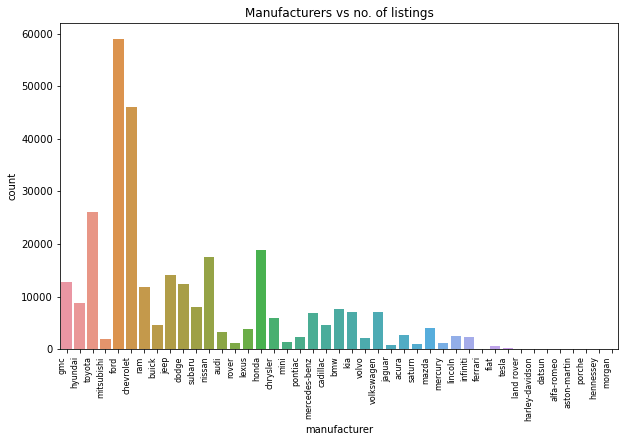

In [10]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='manufacturer',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Manufacturers vs no. of listings")

Model

In [11]:
print ("The unique models we have are:")
print (data['model'].unique())
print (len(data['model'].unique()))

The unique models we have are:
['new sierra 1500' 'sonata' 'prius' ... '1990 F350' 'ranchero gt cobra'
 'Studebaker GT Hawk Torisimo']
26326


Drive

In [12]:
print ("The unique drives we have are:")
print (data['drive'].unique())

The unique drives we have are:
['4wd' 'fwd' 'rwd' nan]


Condition

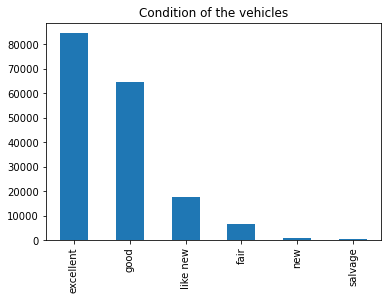

In [13]:
data.condition.value_counts().plot.bar()
plt.title("Condition of the vehicles")
plt.show()

Status

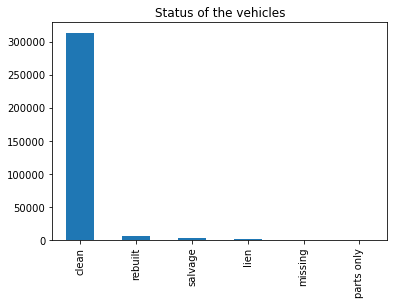

In [14]:
data.title_status.value_counts().plot.bar()
plt.title("Status of the vehicles")
plt.show()

Price

In [15]:
data['price'].describe()

count    4.214340e+05
mean     5.013835e+04
std      9.727504e+06
min      0.000000e+00
25%      4.495000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

Text(0, 0.5, 'Count')

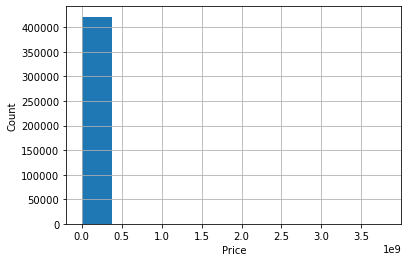

In [16]:
data['price'].hist()
plt.xlabel('Price')
plt.ylabel('Count')

In [17]:
data['price'].value_counts().head()

0       34947
3500     3827
8995     3589
7995     3536
6995     3456
Name: price, dtype: int64

Looks like there are a lot of prices at 0. This most likely means they were posted at "best offer". Since looking through description would make it too complicated, I just dropped them. There are only 35,000 values at 0, which sounds like a lot, but isn't that many out of 423,857. Also we would not be able to predict those entries anyways.


In [18]:
data= data[data['price'] > 0]

In [19]:
data.shape

(386487, 25)

### Missing Values

Won't need variables like 'url', 'region_url', 'image_url', 'description', 'county', 'state', 'lat', 'long' so I got rid of them right away.

In [20]:
data=data.drop(columns=['url','region','id', 'region_url', 'image_url', 'description', 'lat', 'long'])
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,county,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,NaN,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,NaN,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,NaN,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,NaN,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,NaN,mn


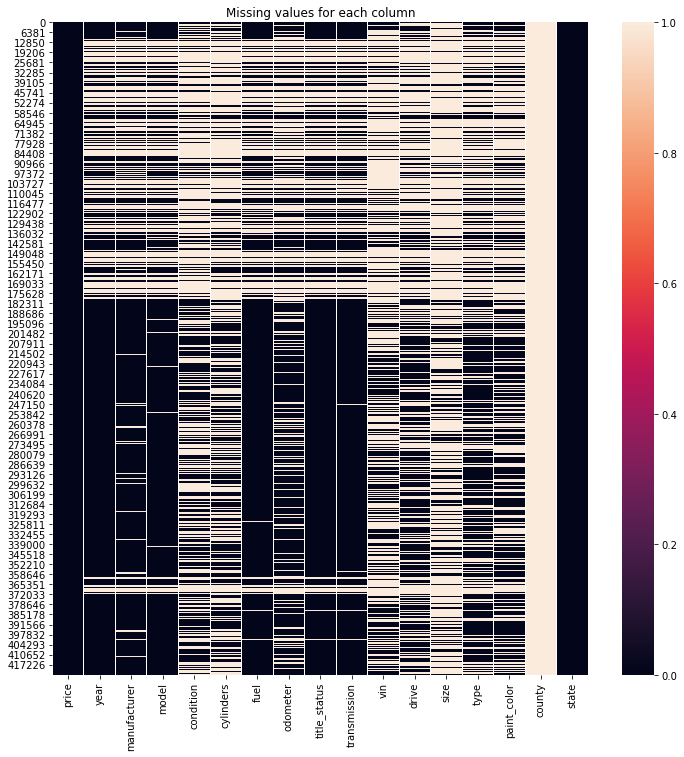

In [21]:
# Display the missing values
plt.figure(figsize=(12,12))
plt.title("Missing values for each column")
sns.heatmap(data.isnull())
plt.show()

In [22]:
data.isnull().sum()

price                0
year             87859
manufacturer    101543
model            90498
condition       221112
cylinders       203545
fuel             89135
odometer        138064
title_status     88532
transmission     88211
vin             221032
drive           175401
size            293043
type            168327
paint_color     182335
county          386487
state                0
dtype: int64

If the coumns have more than 50% missing then drop. 

In [23]:
more_than_50 = data.columns.where((data.isnull().sum()/len(data) * 100) >= 50).dropna()
data = data.drop(columns = more_than_50)
data.shape

(386487, 12)

Since we still have a lot of data to work with, I am just dropping the missing variables instead of imputing them.

In [24]:
data_clean=data.dropna()

In [25]:
data_clean.shape

(137848, 12)

In [29]:
data=data_clean
data.columns #what columns we are left with

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137848 entries, 4 to 423856
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         137848 non-null  int64  
 1   year          137848 non-null  float64
 2   manufacturer  137848 non-null  object 
 3   model         137848 non-null  object 
 4   fuel          137848 non-null  object 
 5   odometer      137848 non-null  float64
 6   title_status  137848 non-null  object 
 7   transmission  137848 non-null  object 
 8   drive         137848 non-null  object 
 9   type          137848 non-null  object 
 10  paint_color   137848 non-null  object 
 11  state         137848 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.7+ MB


In [28]:
data.head()

,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,state
4,16995,2007.0,gmc,sierra classic 2500hd,diesel,254217.0,clean,automatic,4wd,truck,white,mn
5,13995,2012.0,ford,f-150,gas,188406.0,clean,automatic,4wd,truck,grey,mn
6,7995,2010.0,chevrolet,equinox,gas,108124.0,clean,automatic,4wd,SUV,grey,mn
7,8995,2011.0,chevrolet,traverse,gas,178054.0,clean,automatic,4wd,SUV,white,mn
8,10995,2014.0,ford,explorer,gas,170259.0,clean,automatic,4wd,SUV,white,mn
